In [1]:
from fractions import Fraction
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
def load_xy_data(x_path: str,
                 y_path: str) -> tuple[pd.Series, pd.Series]:
    """
    Reads two CSVs of x‐ and y‐values (no headers), converts any rational
    strings in x to floats, ensures y is numeric, and returns numpy arrays.

    Parameters
    ----------
    x_path : str
        Path to the CSV containing x values (one per line, possibly as 'a/b').
    y_path : str
        Path to the CSV containing y values (one numeric value per line).

    Returns
    -------
    x_array : numpy.ndarray
    y_array : numpy.ndarray
    """
    # Load x, convert rationals to floats
    x_df = pd.read_csv(x_path, header=None, names=['x'])
    x_df['x'] = x_df['x'].apply(lambda s: float(Fraction(s)))

    # Load y, ensure numeric
    y_df = pd.read_csv(y_path, header=None, names=['y'])
    y_df['y'] = pd.to_numeric(y_df['y'], errors='raise')

    # Return numpy arrays
    return x_df['x'].to_numpy(), y_df['y'].to_numpy()



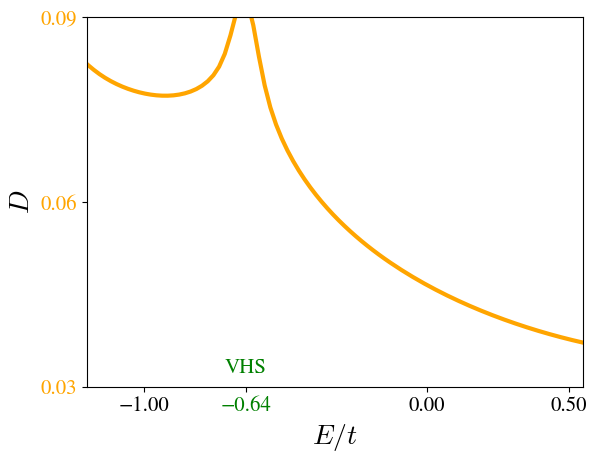

In [4]:
import matplotlib.pyplot as plt
import matplotlib
# set up LaTeX‐style font
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"]     = "STIXGeneral"
import numpy as np
# load all four data sets
x_array,  y_array  = load_xy_data('data3_x_values.csv',   'data3_y_values.csv')
Wxx_array, Wxy_array = load_xy_data('Weigtx_x_values.csv','Weigtx_y_values.csv')
Wyx_array, Wyy_array = load_xy_data('Weigty_x_values.csv','Weigty_y_values.csv')

fig, ax1 = plt.subplots()

# Primary axis: original data + “weight‐X” data
ax1.plot(x_array,   y_array,    marker='o', markersize=0, linewidth=3, label=r'$D(E)$',color="orange")
ax1.set_xlabel(r'$E/t$', fontsize=20)
ax1.set_ylabel(r'$D$', fontsize=20)
ax1.tick_params(axis='y', labelcolor="orange")

ax1.set_xlim([-1.2, 0.55])
ax1.set_ylim([0.03,0.087])
# first set your tick positions
ax1.set_xticks([-1, -0.64, 0,0.5])



# color only the “−0.64” label green
for lbl, x in zip(ax1.get_xticklabels(), ax1.get_xticks()):
    if x == -0.64:
        lbl.set_color('green')
    else:
        lbl.set_color('black')  # or leave as default

ax1.text(  -0.64,              # x coordinate
    0.025,               # y in axis coords (2% above the top)
    "VHS", 
    transform=ax1.get_xaxis_transform(),
    ha='center', 
    va='bottom',
    color='green',
         fontsize=15
)

# then enlarge the x‐axis tick labels
ax1.tick_params(axis='x', labelsize=15)
# first set your tick positions
ax1.set_yticks([0.03,0.06,0.09])

# then enlarge the x‐axis tick labels
ax1.tick_params(axis='y', labelsize=15)

 
fig.savefig('DOS.pdf', bbox_inches='tight')

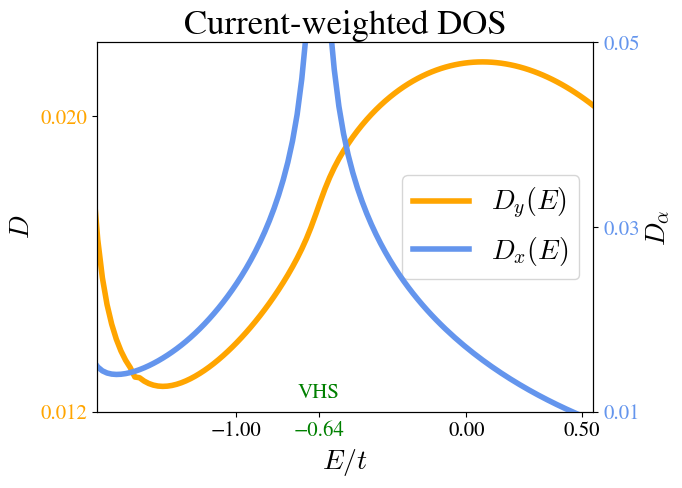

In [26]:
import matplotlib.pyplot as plt
import matplotlib
# set up LaTeX‐style font
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"]     = "STIXGeneral"
import numpy as np
# load all four data sets
x_array,  y_array  = load_xy_data('data3_x_values.csv',   'data3_y_values.csv')
Wxx_array, Wxy_array = load_xy_data('Weigtx_x_values.csv','Weigtx_y_values.csv')
Wyx_array, Wyy_array = load_xy_data('Weigty_x_values.csv','Weigty_y_values.csv')

fig, ax1 = plt.subplots()

# Primary axis: original data + “weight‐X” data
#ax1.plot(x_array,   y_array,    marker='o', markersize=0, linewidth=3, label=r'$D(E)$',color="orange")

ax1.plot(Wyx_array, Wyy_array/(2*np.pi)**2, marker='o', markersize=0, linewidth=4 ,color="orange", label=r'$ D_y(E)$',linestyle="solid" )

ax1.set_xlabel(r'$E/t$', fontsize=20)
ax1.set_ylabel(r'$D$', fontsize=20)
ax1.tick_params(axis='y', labelcolor="orange")

ax1.set_xlim([-1.6, 0.55])
ax1.set_ylim([0.012,0.022])
ax1.set_xticks([-1, -0.64, 0,0.5])

# then enlarge the x‐axis tick labels
ax1.tick_params(axis='x', labelsize=15)
# first set your tick positions
ax1.set_yticks([0.012,0.02])

# then enlarge the x‐axis tick labels
ax1.tick_params(axis='y', labelsize=15)


# first set your tick positions
 


# color only the “−0.64” label green
for lbl, x in zip(ax1.get_xticklabels(), ax1.get_xticks()):
    if x == -0.64:
        lbl.set_color('green')
    else:
        lbl.set_color('black')  # or leave as default

ax1.text(  -0.64,              # x coordinate
    0.025,               # y in axis coords (2% above the top)
    "VHS", 
    transform=ax1.get_xaxis_transform(),
    ha='center', 
    va='bottom',
    color='green',
         fontsize=15
)
 

# Secondary axis: “weight‐Y” data
ax2 = ax1.twinx()
ax2.plot(Wxx_array, Wxy_array/(2*np.pi)**2, marker='o', markersize=0, linewidth=4, label=r'$D_x(E)$',color="cornflowerblue")

ax2.set_ylabel(r'$D_\alpha$', fontsize=20)
ax2.tick_params(axis='y', labelcolor="cornflowerblue")

 


ax2.set_ylim([0.01,0.05])
ax2.set_yticks([0.01,0.03,0.05])
ax2.tick_params(axis='y', labelsize=15)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2,
           labels1 + labels2,
           loc='right',
           fontsize=20)
plt.title("Current-weighted DOS",fontsize=25)
fig.savefig('DOS.pdf', bbox_inches='tight')